#### This notebook re-creates plots similar to Path-O-Gen output but the evolutionary distance is pairwise nt distances only (no correction for back mutation via evolutionary models). This should output a clock rate based on a regression that is unaffected by recombination.

#### The goal of doing this is to check whether this is similar to clock estimates from Path-O-Gen and from BEAST control runs.

#### Reference sequence is the most basal sequence from the best-rooted tree exported from Path-O-Gen
* Reference for Env: H0725135|1997-07-25|env
* Reference for Prot: H0725135|1997-07-25|prot and trying T0527136|2009-05-27|prot (outgroup appears different depending on whether best root is selected in path-o-gen or not)
* Reference for RT: H0725135|1997-07-25|RT and R0222042|2007-02-22|RT (outgroup appears different depending on whether best root is selected in path-o-gen or not)


In [77]:
#Import necessary libraries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
%matplotlib inline

## ENV sequences

In [6]:
# Measure raw clock rate for Env
# Once alignment is read in need to 1) define the reference, 2) count nt diffs from ref for each seq 
# 3) plot nt differences as a function of sampling date.

env_ntdiff_dict = {}

with open("Env_PathOGen_Data.txt", 'rU') as f: #rU allows \n and \r to designate newline
	for line in f:
		split_line = line.split("\t")
		env_ntdiff_dict[split_line[0]] = {'date': split_line[1].strip()}

In [35]:
print env_ntdiff_dict['R0221192|2007-02-21|env']['date']

2007.139858544376


In [12]:
# Add Env control sequences to the env_ntdiff dictionary based on taxon names
env_infile = open('env_controls_aligned_DATED.fasta','rU')
env_seq_dict = SeqIO.to_dict(SeqIO.parse(env_infile, "fasta"))
env_infile.close()

for key in env_seq_dict.keys():
    env_ntdiff_dict[key]['seq'] = env_seq_dict[key].seq.upper()

In [181]:
#function to define the number of nt differences between a comparator sequence and a reference seq
#gaps and ambiguous bases are considered missing information, and therefore do not count as nt differences
#reference and comparator are strings of nt sequence (eg 'ACCTTGGG')
def count_nt_diffs(reference,comparator):
    counter = 0
    reference = reference.upper()
    comparator = comparator.upper()
    for (a,b) in zip(reference,comparator):
        if a == b:
            counter += 0
        elif a == '-':
            continue
        elif b == '-':
            continue
        elif a in ['A','C','G','T'] and b in ['A','C','G','T']:
            if a != b:
                counter += 1
    return counter

In [182]:
#function to determine the informative sequence length, ie sequence length excluding gaps and ambiguous bases
#this is the denominator that we need to use to determine the number of nt differences per site.
#as above, reference and comparator are strings of nt sequence
def count_informative_length(reference,comparator):
    length = 0
    reference = reference.upper()
    comparator = comparator.upper()
    for (a,b) in zip(reference,comparator):
        if a in ['A','C','G','T'] and b in ['A','C','G','T']:
            length += 1
    return length

In [185]:
#Test difference and length counter functions
#with the test sequences below there should only be 3 informative sites, and 1 nt difference
seq1 = 'AaA--T'
seq2 = 'AaGaA-'

trial_count = count_nt_diffs(seq1, seq2)
trial_length = count_informative_length(seq1,seq2)

print trial_count
print trial_length
print float(trial_count)/float(trial_length)

#Sweet, appears to work the way I want it to

1
3
0.333333333333


In [186]:
env_reference_seq = env_ntdiff_dict['H0725135|1997-07-25|env']['seq']
#print len(env_ntdiff_dict['H0725135|1997-07-25|env']['seq'])

for key in env_ntdiff_dict.keys():
    if key == 'H0725135|1997-07-25|env':
        env_ntdiff_dict[key]['diff_per_site'] = 'Reference'
    else:
        comp_seq = env_ntdiff_dict[key]['seq']
        nt_diffs = count_nt_diffs(env_reference_seq, comp_seq)
        informative_length = count_informative_length(env_reference_seq, comp_seq)
        
        env_ntdiff_dict[key]['nt_diffs'] = nt_diffs
        nt_diff_per_site = (float(nt_diffs)/float(informative_length))
        env_ntdiff_dict[key]['diff_per_site'] = nt_diff_per_site

In [187]:
env_dates_list = []
env_nt_diffs_list = []
for key in env_ntdiff_dict.keys():
    if key == 'H0725135|1997-07-25|env':
        continue #this is the reference
    else:
        env_dates_list.append(float(env_ntdiff_dict[key]['date']))
        env_nt_diffs_list.append(float(env_ntdiff_dict[key]['diff_per_site']))

[  1.34740927e-03  -2.46840526e+00]


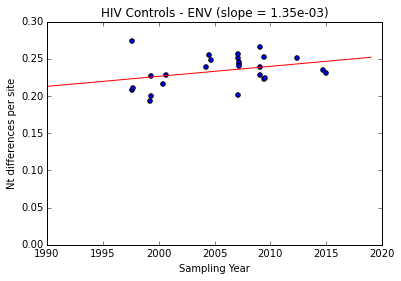

In [197]:
env_linear_line_fit = np.polyfit(env_dates_list, env_nt_diffs_list, deg=1)#1-degree ploynomial is a linear line
print env_linear_line_fit
#returns a list where [0] is slope and [1] is the y-intercept

fig, ax = plt.subplots()
plotting_years = range(1990,2020)

ax.plot(plotting_years, (env_linear_line_fit[0] * np.array(plotting_years) + env_linear_line_fit[1]), color='red')
ax.scatter(env_dates_list, env_nt_diffs_list)
ax.axis([1990,2020,0,0.3])
plt.xlabel("Sampling Year")
plt.ylabel("Nt differences per site")
plt.title('HIV Controls - ENV (slope = 1.35e-03)')

plt.savefig("Env_clockplot_H0725135_OUT.pdf")
plt.savefig("Env_clockplot_H0725135_OUT.png")

## Prot Sequences

In [191]:
prot_ntdiff_dict = {}

with open("Prot_PathOGen_Data.txt", 'rU') as f: #rU allows \n and \r to designate newline
	for line in f:
		split_line = line.split("\t")
		prot_ntdiff_dict[split_line[0]] = {'date': split_line[1].strip()}

print prot_ntdiff_dict['H0725135|1997-07-25|prot']['date']

1997.5627424138718


In [192]:
# Add Prot control sequences to the prot_ntdiff dictionary based on taxon names
prot_infile = open('prot_controls_aligned_DATED.fasta','rU')
prot_seq_dict = SeqIO.to_dict(SeqIO.parse(prot_infile, "fasta"))
prot_infile.close()

for key in prot_seq_dict.keys():
    prot_ntdiff_dict[key]['seq'] = prot_seq_dict[key].seq.upper()

In [193]:
prot_reference_seq = prot_ntdiff_dict['H0725135|1997-07-25|prot']['seq']

for key in prot_ntdiff_dict.keys():
    if key == 'H0725135|1997-07-25|prot':
        prot_ntdiff_dict[key]['diff_per_site'] = 'Reference'
    else:
        comp_seq = prot_ntdiff_dict[key]['seq']
        nt_diffs = count_nt_diffs(prot_reference_seq, comp_seq)
        informative_length = count_informative_length(prot_reference_seq, comp_seq)
        
        prot_ntdiff_dict[key]['nt_diffs'] = nt_diffs
        nt_diff_per_site = (float(nt_diffs)/float(informative_length))
        prot_ntdiff_dict[key]['diff_per_site'] = nt_diff_per_site

In [194]:
prot_dates_list = []
prot_nt_diffs_list = []
for key in prot_ntdiff_dict.keys():
    if key == 'H0725135|1997-07-25|prot':
        continue #this is the reference
    else:
        prot_dates_list.append(float(prot_ntdiff_dict[key]['date']))
        prot_nt_diffs_list.append(float(prot_ntdiff_dict[key]['diff_per_site']))

[  1.55539155e-03  -3.09269429e+00]


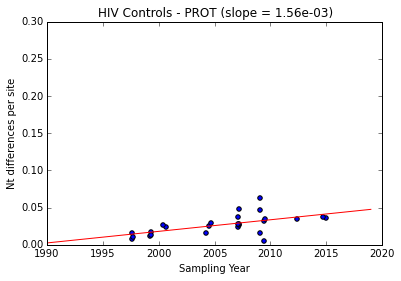

In [198]:
prot_linear_line_fit = np.polyfit(prot_dates_list, prot_nt_diffs_list, deg=1)#1-degree ploynomial is a linear line
print prot_linear_line_fit
#returns a list where [0] is slope and [1] is the y-intercept

fig, ax = plt.subplots()
plotting_years = range(1990,2020)

ax.plot(plotting_years, (prot_linear_line_fit[0] * np.array(plotting_years) + prot_linear_line_fit[1]), color='red')
ax.scatter(prot_dates_list, prot_nt_diffs_list)
ax.axis([1990,2020,0,0.3])
plt.xlabel("Sampling Year")
plt.ylabel("Nt differences per site")
plt.title('HIV Controls - PROT (slope = 1.56e-03)')

plt.savefig("Prot_clockplot_H0725135_OUT.pdf")
plt.savefig("Prot_clockplot_H0725135_OUT.png")

[  9.12865767e-04  -1.79682148e+00]


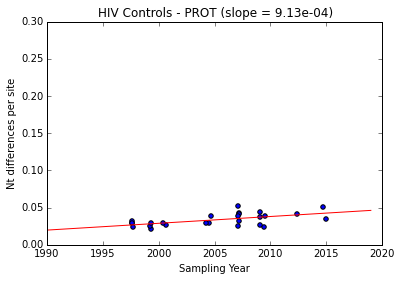

In [204]:
#SENSITIVITY ANALYSIS IF USE DIFFERENT OUTGROUP
#SLOPE ESTIMATE DOES CHANGE WHEN I USE A DIFFERENT OUTGROUP...
prot_reference_seq = prot_ntdiff_dict['T0527136|2009-05-27|prot']['seq']

for key in prot_ntdiff_dict.keys():
    if key == 'T0527136|2009-05-27|prot':
        prot_ntdiff_dict[key]['diff_per_site'] = 'Reference'
    else:
        comp_seq = prot_ntdiff_dict[key]['seq']
        nt_diffs = count_nt_diffs(prot_reference_seq, comp_seq)
        informative_length = count_informative_length(prot_reference_seq, comp_seq)
        
        prot_ntdiff_dict[key]['nt_diffs'] = nt_diffs
        nt_diff_per_site = (float(nt_diffs)/float(informative_length))
        prot_ntdiff_dict[key]['diff_per_site'] = nt_diff_per_site
        
prot_dates_list = []
prot_nt_diffs_list = []

for key in prot_ntdiff_dict.keys():
    if key == 'T0527136|2009-05-27|prot':
        continue #this is the reference
    else:
        prot_dates_list.append(float(prot_ntdiff_dict[key]['date']))
        prot_nt_diffs_list.append(float(prot_ntdiff_dict[key]['diff_per_site']))
        
prot_linear_line_fit = np.polyfit(prot_dates_list, prot_nt_diffs_list, deg=1)#1-degree ploynomial is a linear line
print prot_linear_line_fit
#returns a list where [0] is slope and [1] is the y-intercept

fig, ax = plt.subplots()
plotting_years = range(1990,2020)

ax.plot(plotting_years, (prot_linear_line_fit[0] * np.array(plotting_years) + prot_linear_line_fit[1]), color='red')
ax.scatter(prot_dates_list, prot_nt_diffs_list)
ax.axis([1990,2020,0,0.3])
plt.xlabel("Sampling Year")
plt.ylabel("Nt differences per site")
plt.title('HIV Controls - PROT (slope = 9.13e-04)')

plt.savefig("Prot_clockplot_T0527136_OUT.pdf")
plt.savefig("Prot_clockplot_T0527136_OUT.png")

## RT Sequences

In [163]:
RT_ntdiff_dict = {}

with open("RT_PathOGen_Data.txt", 'rU') as f: #rU allows \n and \r to designate newline
	for line in f:
		split_line = line.split("\t")
		RT_ntdiff_dict[split_line[0]] = {'date': split_line[1].strip()}

# Add RT control sequences to the prot_ntdiff dictionary based on taxon names
RT_infile = open('RT_controls_aligned_DATED.fasta','rU')
RT_seq_dict = SeqIO.to_dict(SeqIO.parse(RT_infile, "fasta"))
RT_infile.close()

for key in RT_seq_dict.keys():
    RT_ntdiff_dict[key]['seq'] = RT_seq_dict[key].seq.upper()

print RT_ntdiff_dict['W0530014|2012-05-30|RT']['date']

2012.410107232489


[  1.34254502e-03  -2.66611815e+00]


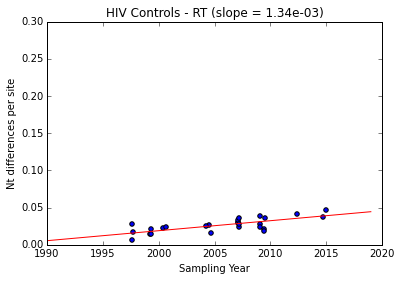

In [201]:
RT_reference_seq = RT_ntdiff_dict['H0725135|1997-07-25|RT']['seq']

for key in RT_ntdiff_dict.keys():
    if key == 'H0725135|1997-07-25|RT':
        RT_ntdiff_dict[key]['diff_per_site'] = 'Reference'
    else:
        comp_seq = RT_ntdiff_dict[key]['seq']
        nt_diffs = count_nt_diffs(RT_reference_seq, comp_seq)
        informative_length = count_informative_length(RT_reference_seq, comp_seq)
        
        RT_ntdiff_dict[key]['nt_diffs'] = nt_diffs
        nt_diff_per_site = (float(nt_diffs)/float(informative_length))
        RT_ntdiff_dict[key]['diff_per_site'] = nt_diff_per_site
        
RT_dates_list = []
RT_nt_diffs_list = []

for key in RT_ntdiff_dict.keys():
    if key == 'H0725135|1997-07-25|RT':
        continue #this is the reference
    else:
        RT_dates_list.append(float(RT_ntdiff_dict[key]['date']))
        RT_nt_diffs_list.append(float(RT_ntdiff_dict[key]['diff_per_site']))
        
RT_linear_line_fit = np.polyfit(RT_dates_list, RT_nt_diffs_list, deg=1)#1-degree ploynomial is a linear line
print RT_linear_line_fit
#returns a list where [0] is slope and [1] is the y-intercept

fig, ax = plt.subplots()
plotting_years = range(1990,2020)

ax.plot(plotting_years, (RT_linear_line_fit[0] * np.array(plotting_years) + RT_linear_line_fit[1]), color='red')
ax.scatter(RT_dates_list, RT_nt_diffs_list)
ax.axis([1990,2020,0,0.3])
plt.xlabel("Sampling Year")
plt.ylabel("Nt differences per site")
plt.title('HIV Controls - RT (slope = 1.34e-03)')

plt.savefig("RT_clockplot_H0725135_OUT.pdf")
plt.savefig("RT_clockplot_H0725135_OUT.png")

[  6.12572140e-04  -1.19186467e+00]


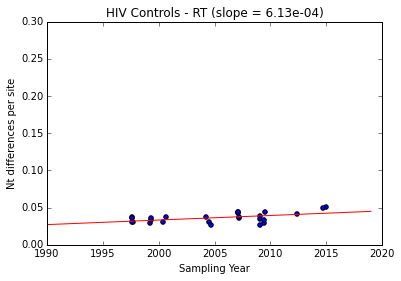

In [203]:
#RT SENSITIVITY ANALYSIS
RT_reference_seq = RT_ntdiff_dict['R0222042|2007-02-22|RT']['seq']

for key in RT_ntdiff_dict.keys():
    if key == 'R0222042|2007-02-22|RT':
        RT_ntdiff_dict[key]['diff_per_site'] = 'Reference'
    else:
        comp_seq = RT_ntdiff_dict[key]['seq']
        nt_diffs = count_nt_diffs(RT_reference_seq, comp_seq)
        informative_length = count_informative_length(RT_reference_seq, comp_seq)
        
        RT_ntdiff_dict[key]['nt_diffs'] = nt_diffs
        nt_diff_per_site = (float(nt_diffs)/float(informative_length))
        RT_ntdiff_dict[key]['diff_per_site'] = nt_diff_per_site
        
RT_dates_list = []
RT_nt_diffs_list = []
for key in RT_ntdiff_dict.keys():
    if key == 'R0222042|2007-02-22|RT':
        continue #this is the reference
    else:
        RT_dates_list.append(float(RT_ntdiff_dict[key]['date']))
        RT_nt_diffs_list.append(float(RT_ntdiff_dict[key]['diff_per_site']))
        
RT_linear_line_fit = np.polyfit(RT_dates_list, RT_nt_diffs_list, deg=1)#1-degree ploynomial is a linear line
print RT_linear_line_fit
#returns a list where [0] is slope and [1] is the y-intercept

fig, ax = plt.subplots()
plotting_years = range(1990,2020)

ax.plot(plotting_years, (RT_linear_line_fit[0] * np.array(plotting_years) + RT_linear_line_fit[1]), color='red')
ax.scatter(RT_dates_list, RT_nt_diffs_list)
ax.axis([1990,2020,0,0.3])
plt.xlabel("Sampling Year")
plt.ylabel("Nt differences per site")
plt.title('HIV Controls - RT (slope = 6.13e-04)')

plt.savefig("RT_clockplot_R0222042_OUT.pdf")
plt.savefig("RT_clockplot_R0222042_OUT.png")